In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cleveland - cleveland.csv', header = None)

In [ ]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [ ]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [ ]:
### Mapeia as classes transformando o problema em binário
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [ ]:
### Verifica se há valores nulos
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [ ]:
# Calculando a média de cada coluna
media_por_coluna = df.mean()

# Substituindo os valores nulos pela média de cada coluna
df_preenchido = df.fillna(media_por_coluna)

# ainda há valores nulos?
print("Valores nulos após o preenchimento:")
print(df_preenchido.isna().sum())


Valores nulos após o preenchimento:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
X = df_preenchido.iloc[:, :-1].values
y = df_preenchido.iloc[:, -1].values

In [ ]:
## Separa os dados em treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
## Normaliza os dados
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Ajustando o scaler aos dados e transformando os dados
dados_normalizados = scaler.fit_transform(df)

# Convertendo os dados normalizados de volta para um DataFrame, se necessário
df_normalizado = pd.DataFrame(dados_normalizados, columns=df.columns)

# Visualizando os dados normalizados
print(df_normalizado)


          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1    1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2    1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3   -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4   -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   
..        ...       ...       ...       ...       ...       ...       ...   
298 -1.046013  0.686202 -2.251775 -1.234430  0.334813 -0.417635 -0.996749   
299  1.502821  0.686202  0.877985  0.700612 -1.038723  2.394438 -0.996749   
300  0.283813  0.686202  0.877985 -0.096170 -2.238149 -0.417635 -0.996749   
301  0.283813 -1.457296 -1.208521 -0.096170 -0.206864 -0.417635  1.016684   
302 -1.821745  0.686202 -0.165268  0.359134 -1.386944 -0.417635 -0.996749   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [ ]:
# Treinamento Modelo
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

[[117  12]
 [ 20  93]]
[[30  5]
 [ 8 18]]


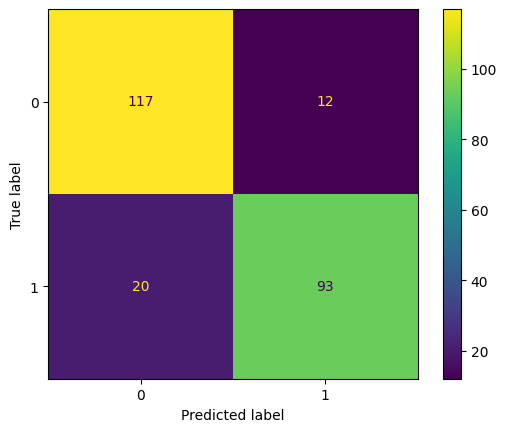

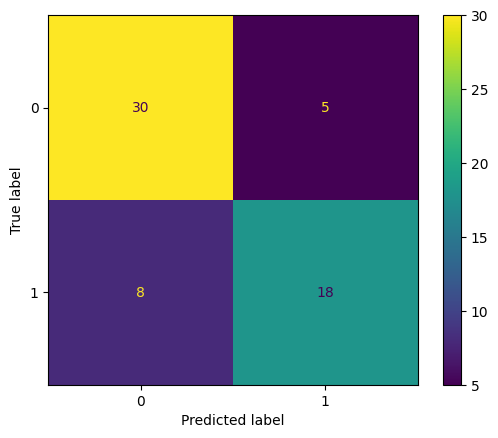

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
disp = ConfusionMatrixDisplay(cm_train, display_labels=classifier.classes_)
disp.plot()

y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)
disp = ConfusionMatrixDisplay(cm_test, display_labels=classifier.classes_)
disp.plot()

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA aos dados imputados
pca = PCA(n_components=8)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

classifier_pca = GaussianNB()
classifier_pca.fit(X_train_pca, y_train)

GaussianNB()

[[110  19]
 [ 17  96]]
[[32  3]
 [ 7 19]]


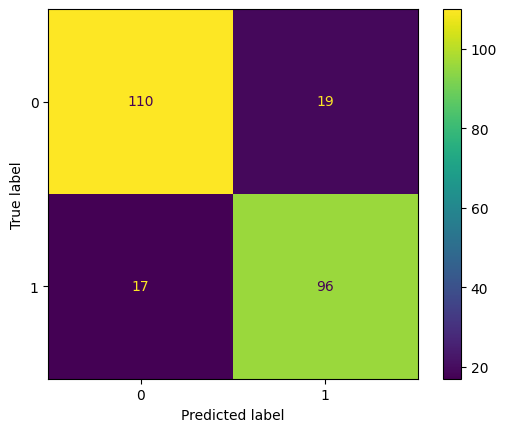

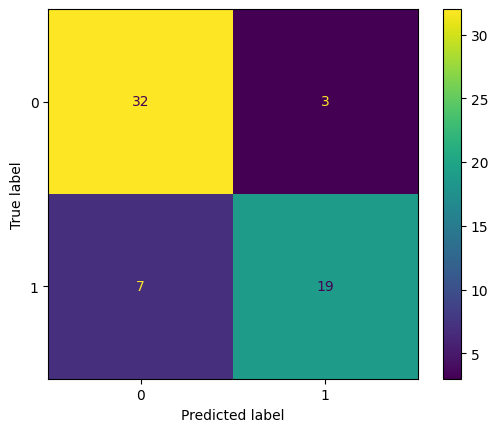

In [ ]:
y_pred_train_pca = classifier_pca.predict(X_train_pca)
cm_train_pca = confusion_matrix(y_train, y_pred_train_pca)
print(cm_train_pca)
disp = ConfusionMatrixDisplay(cm_train_pca, display_labels=classifier_pca.classes_)
disp.plot()

y_pred_test_pca = classifier_pca.predict(X_test_pca)
cm_test_pca = confusion_matrix(y_test, y_pred_test_pca)
print(cm_test_pca)
disp = ConfusionMatrixDisplay(cm_test_pca, display_labels=classifier_pca.classes_)
disp.plot()

In [ ]:
#Separando o data set em treino e teste


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Matriz de Confusão teste
[[28  8]
 [ 7 18]]


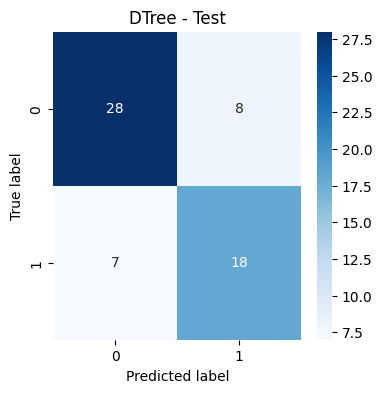

Matriz de Confusão treinamento
[[129   0]
 [  0 113]]


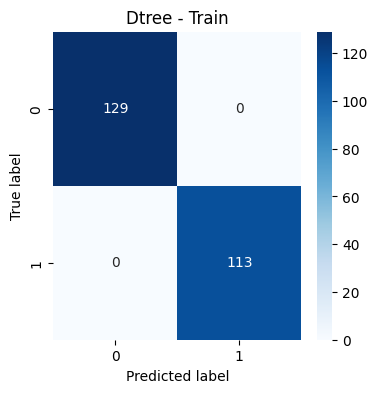


Accuracy for training set for Dtree = 1.0
Accuracy for test set for Dtree = 0.7540983606557377


In [ ]:
 #  Árvore de Decisão


from sklearn import tree

# Treinamento Modelo
Dtree = tree.DecisionTreeClassifier()
Dtree.fit(X_train, y_train)

# Teste modelo
y_pred = Dtree.predict(X_test)

# Resultados
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix



#gera matriz de confusão dos dados de teste
cm_test = confusion_matrix(y_pred, y_test)
#imprime a matriz de confusão
print ('Matriz de Confusão teste')
print(cm_test)

# Teste modelo
y_pred_test = Dtree.predict(X_test)

# Para uma visualização melhor, você pode usar a biblioteca Seaborn para plotar a matriz de confusão
plt.figure(figsize=(4,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('DTree - Test')
plt.show()

#gera matriz de confusão dos dados de treinamento
y_pred_train = Dtree.predict(X_train)
#imprime a matriz de confusão
cm_train = confusion_matrix(y_pred_train, y_train)
print ('Matriz de Confusão treinamento')
print(cm_train)


# Para uma visualização melhor, você pode usar a biblioteca Seaborn para plotar a matriz de confusão
plt.figure(figsize=(4,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Dtree - Train')
plt.show()


#disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
#disp.ax_.set_title('Naive Bayes - Test')
#print(disp.confusion_matrix)
#plt.show()

#y_pred_train = classifier.predict(X_train)
#cm_train = confusion_matrix(y_pred_train, y_train)
#print(cm_train)

#disp = plot_confusion_matrix(classifier, X_train, y_train, cmap=plt.cm.Blues)
#disp.ax_.set_title('Naive Bayes - Train')
#print(disp.confusion_matrix)
#plt.show()

print()
print('Accuracy for training set for Dtree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Dtree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

In [ ]:
########################## KFOLD é utilizado para dividir o dataset em x partes (n_splits) ##########################

# algoritmo para exibir as divisoes (folds)
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

for i, (X_1, Y_1) in enumerate(kf.split(X)):
    print(f"Pasta {i}:")
    print(f"  Train: index={X_1}")
    print(f"  Test:  index={Y_1}")

Pasta 0:
  Train: index=[ 31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 27

In [ ]:
from sklearn.metrics import accuracy_score

# Definir o número de folds para a validação cruzada
n_folds = 10

# Inicializar o KFold
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Lista para armazenar as acurácias de cada fold
accuracy_scores = []

# Realizar a validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model_DTree_KF = tree.DecisionTreeClassifier()
    model_DTree_KF.fit(X_train, y_train)

    y_pred = model_DTree_KF.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Exibir a acurácia média e o desvio padrão
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f'Média de acurácia: {mean_accuracy:.2f}')
print(f'Desvio padrão de acurácia: {std_accuracy:.2f}')

Média de acurácia: 0.75
Desvio padrão de acurácia: 0.09
